# Simulando modelos exponenciais com base estocástica

$f(t) = Ab(t)^t$

$log(f(t)) = t\cdot (log(A) + log(b(t))$

In [108]:
import numpy as np
from matplotlib import pyplot as plt

In [109]:
def f(t):
    A = 1.
    return A*b(t)**t

## Primeiro caso: taxa constante

In [110]:
def b(t):
    '''
    Função que fornece a taxa diária de crescimento
    Neste cenário, a taxa é constante
    '''
    b = 2.
    return b

In [111]:
t = np.arange(0, 30, step = 1)
y = [f(s) for s in t]
d = [y[i+1] / y[i] -1 for i in range(len(y)-1)]

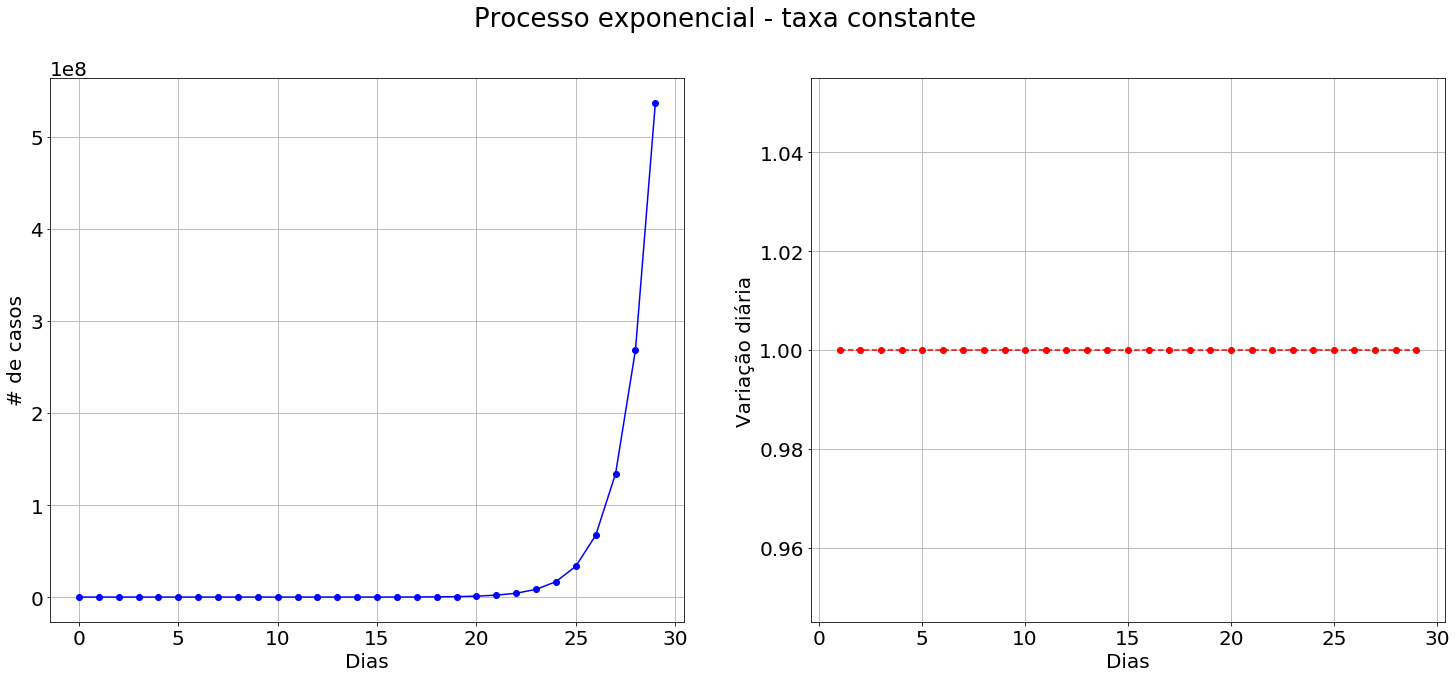

In [112]:
plt.rcParams.update({'font.size' : 20})
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (25, 10))
fig.suptitle('Processo exponencial - taxa constante', fontsize = 26)
ax1.plot(t, y, 'bo-')
ax1.grid(True)
ax1.set_xlabel('Dias')
ax1.set_ylabel('# de casos')
ax2.plot(t[1:], d, 'ro--')
ax2.grid(True)
ax2.set_xlabel('Dias')
ax2.set_ylabel('Variação diária')
plt.show()

## Segundo caso: taxa constante + ruído gaussiano

In [151]:
def b(t):
    '''
    Função que fornece a taxa diária de crescimento
    Neste cenário, a taxa média é constante, mas há uma variação diária
    '''
    b = 2. + np.random.normal(0, .005)
    return b

In [154]:
t = np.arange(0, 30, step = 1)
y = [f(s) for s in t]
d = [y[i+1] / y[i] -1 for i in range(len(y)-1)]

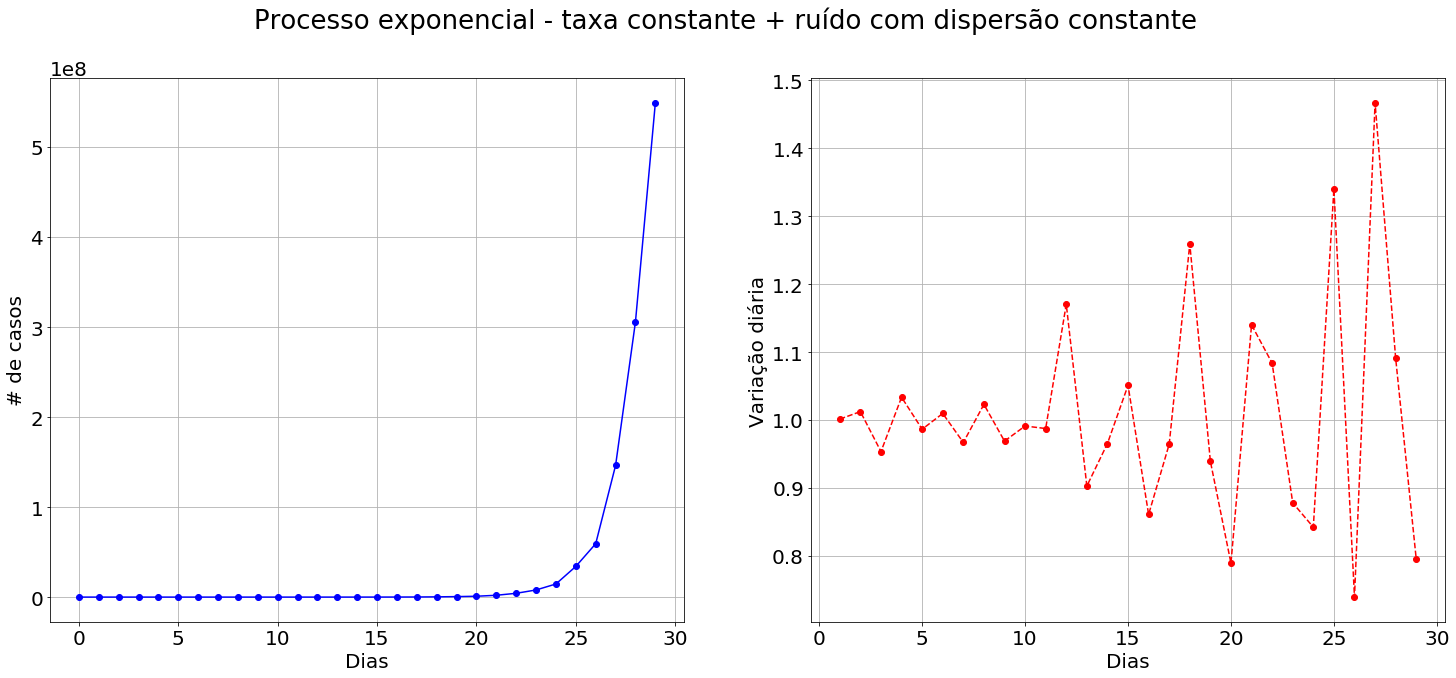

In [155]:
plt.rcParams.update({'font.size' : 20})
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (25, 10))
fig.suptitle('Processo exponencial - taxa constante + ruído com dispersão constante', fontsize = 26)
ax1.plot(t, y, 'bo-')
ax1.grid(True)
ax1.set_xlabel('Dias')
ax1.set_ylabel('# de casos')
ax2.plot(t[1:], d, 'ro--')
ax2.grid(True)
ax2.set_xlabel('Dias')
ax2.set_ylabel('Variação diária')
plt.show()

## Terceiro caso: taxa decresce linearmente a partir de um certo momento

Para simular quarentena

In [156]:
def b(t):
    '''
    Função que fornece a taxa diária de crescimento
    Neste cenário, a taxa média é constante, mas há uma variação diária
    '''
    
    t0 = 15
    if t <= t0:
        b = 2. + np.random.normal(0, .01)
    else:
        b = 2. - 0.05*(t-t0) + np.random.normal(0, .01)
    return b

In [157]:
t = np.arange(0, 30, step = 1)
y = [f(s) for s in t]
d = [y[i+1] / y[i] -1 for i in range(len(y)-1)]

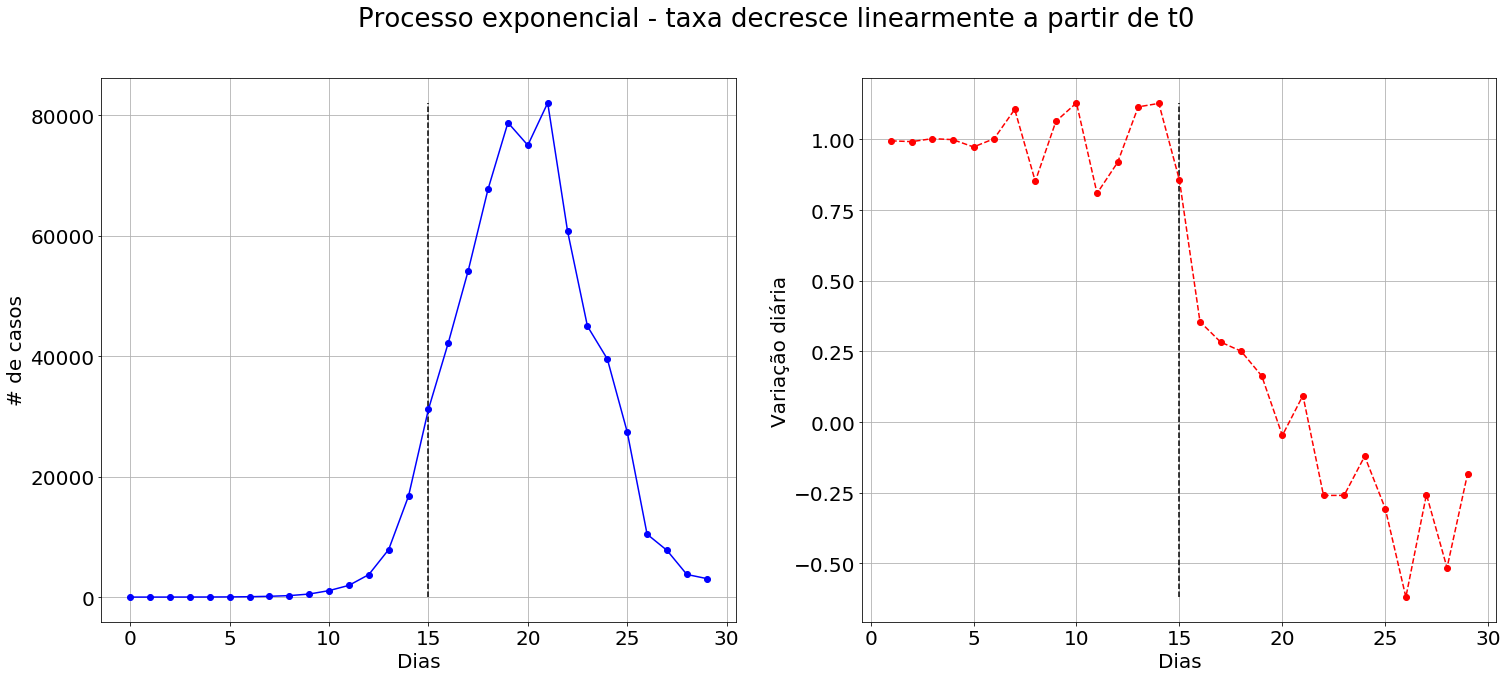

In [158]:
plt.rcParams.update({'font.size' : 20})
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (25, 10))
fig.suptitle('Processo exponencial - taxa decresce linearmente a partir de t0', fontsize = 26)
ax1.plot(t, y, 'bo-')
ax1.vlines(x = 15, ymin = 0, ymax = max(y), linestyles = 'dashed')
ax1.grid(True)
ax1.set_xlabel('Dias')
ax1.set_ylabel('# de casos')
ax2.plot(t[1:], d, 'ro--')
ax2.vlines(x = 15, ymin = min(d), ymax = max(d), linestyles = 'dashed')
ax2.grid(True)
ax2.set_xlabel('Dias')
ax2.set_ylabel('Variação diária')
plt.show()

## Quarto caso: taxa constante + limitação no número de casos

Simulando a situação em que o teto de testes disponíveis por dia foi alcançadoi

In [116]:
def b(t):
    '''
    Função que fornece a taxa diária de crescimento
    Neste cenário, a taxa média é constante, mas há uma variação diária
    '''
    b = 2. + np.random.normal(0, .01)
    return b

In [120]:
def f_limitado(t):
    '''
    Número de casos
    Aqui o número de casos novos é limitado pelo número de testes disponíveis
    '''
    
    # Processo real (latente, não-observável)
    yreal = [f(s) for s in t]
    
    # Processo observado - número novo de casos não pode ultrapassar o máximo de testes
    MAXTESTES = 10000000
    
    y = [yreal[0]]
    for i in range(1, len(yreal)):
        if yreal[i] - yreal[i-1] <= MAXTESTES:
            y.append(yreal[i])
        else:
            y.append(y[-1] + MAXTESTES)

    
    d = [y[i+1] / y[i] -1 for i in range(len(y)-1)]
    
    return yreal, y, d

In [121]:
t = np.arange(0, 30, step = 1)

yreal, y, d = f_limitado(t)

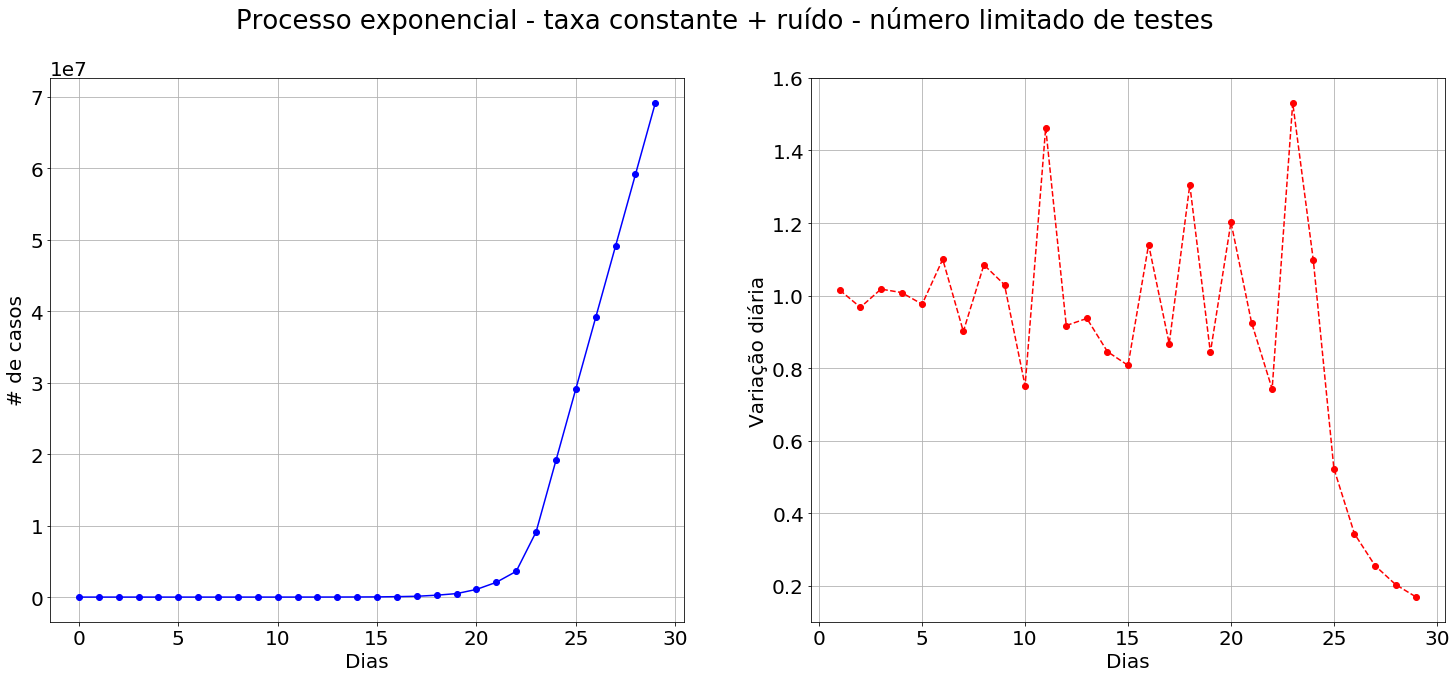

In [122]:
plt.rcParams.update({'font.size' : 20})
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (25, 10))
fig.suptitle('Processo exponencial - taxa constante + ruído - número limitado de testes', fontsize = 26)
ax1.plot(t, y, 'bo-')
ax1.grid(True)
ax1.set_xlabel('Dias')
ax1.set_ylabel('# de casos')
ax2.plot(t[1:], d, 'ro--')
ax2.grid(True)
ax2.set_xlabel('Dias')
ax2.set_ylabel('Variação diária')
plt.show()